In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


In [25]:

def load_data(file_path):
    data = pd.read_csv(file_path, header=None)
    X = data.iloc[:, :2].values 
    y = data.iloc[:, 2].values   
    return X, y

In [26]:

def preprocess_data(X, degree=6):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    return X_poly, poly  


In [27]:

def train_model(X_poly, y):
    model = LogisticRegression()
    model.fit(X_poly, y)
    return model


In [28]:

def plot_decision_boundary(model, X, y, poly):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z, levels=[0.5], colors='green')  
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')  
    plt.title("Decision Boundary and Data Scatter")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


In [29]:

def evaluate_model(model, X_poly, y):
    accuracy = model.score(X_poly, y)
    print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 83.05%


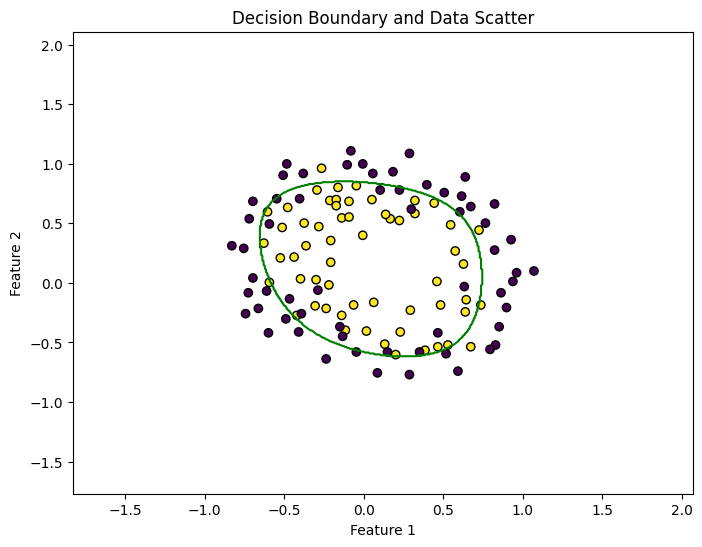

In [30]:

def main(file_path):
    X, y = load_data(file_path)
    
    X_poly, poly = preprocess_data(X, degree=6)
    model = train_model(X_poly, y)
    
    evaluate_model(model, X_poly, y)
    plot_decision_boundary(model, X, y, poly)

file_path = 'quality_test.csv'  
main(file_path)